In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def ros(speed,tanphi):
  # simplified rate of spread from wind speed and slope in propagation direction
  r0=0.1
  windf = 10*max(0.,speed)**1.2
  slopef = 10*max(0.,tanphi)**1.3
  return r0*(1+windf+slopef)


In [ ]:
def ros_print(speed,tanphi):
  print("wind speed %s tanphi %s ros %s" % (speed,tanphi,ros(speed,tanphi)))

In [ ]:
ros_print(0,0)
ros_print(1,0)
ros_print(2,0)
ros_print(4,0)

wind speed 0 tanphi 0 ros 0.1
wind speed 1 tanphi 0 ros 1.1
wind speed 2 tanphi 0 ros 2.39739670999407
wind speed 4 tanphi 0 ros 5.378031643091577


In [ ]:
def plot_ros(wind,wind_deg,slope,slope_deg):
  wind_a = wind_deg*np.pi/180
  slope_a = slope_deg*np.pi/180
  p=1000
  alpha=np.linspace(0,2*np.pi,p)
  x = np.zeros(p)
  y = np.zeros(p)
  r = np.zeros(p)
  speed = np.zeros(p)
  tanphi = np.zeros(p)
  for i in range(p):
     speed[i] = wind  * np.cos(wind_a - alpha[i])
     tanphi[i] = slope * np.cos(slope_a - alpha[i])
     r[i] = ros(speed[i],tanphi[i])  # ros in propagation alpha(i)
     x[i]=np.cos(alpha[i])*r[i]
     y[i]=np.sin(alpha[i])*r[i]

  plt.plot(x,y)
  plt.title('ROS for WRF-SFIRE wind %s angle %s deg slope %s angle %s deg from horizontal' 
            % (wind,wind_deg,slope,slope_deg))
  plt.axis('equal')
  # print('alpha=',alpha)
  # print('x=    ',x)
  # print('y=    ',y)

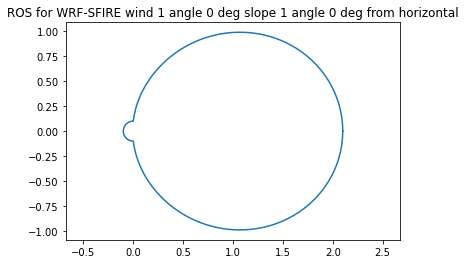

In [ ]:
plot_ros(1,0,1,0)

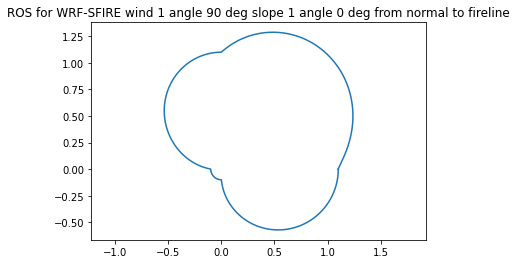

In [ ]:
plot_ros(1,90,1,0)

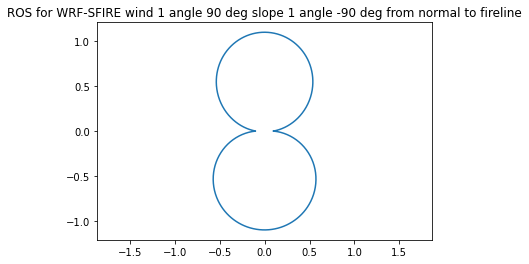

In [ ]:
plot_ros(1,90,1,-90)

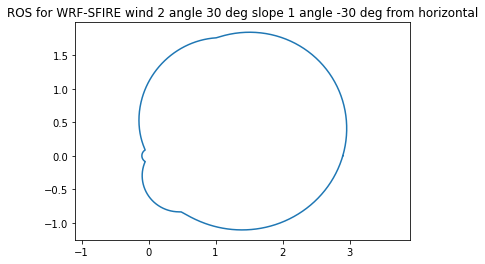

In [ ]:
plot_ros(2,30,1,-30)

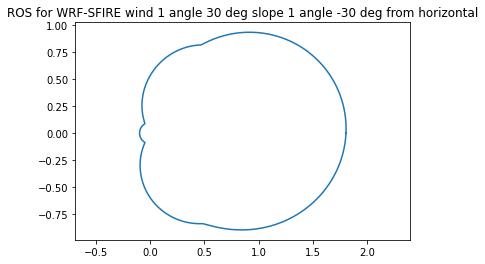

In [ ]:
plot_ros(1,30,1,-30)